# KIBV Übung 2

In [3]:
import os
from PIL import Image
import numpy as np

## Import Data

In [4]:
from config import directory

In [5]:
sequences = [f for f in os.listdir(directory) if os.path.isdir(os.path.join(directory, f))]
print(f"Anzahl der Sequenzen:\t{len(sequences)}")

Anzahl der Sequenzen:	15


In [6]:
print("Anzahl der Bilder je Sequenz:")

for sequence in sequences:
    images_path = os.path.join(directory, sequence, 'images')
    if os.path.exists(images_path):  # Check if 'images' folder exists
        images = [img for img in os.listdir(images_path) if img.endswith(('.png'))]
        print(f'{sequence}\timages: {len(images)}')

Anzahl der Bilder je Sequenz:
seq_1	images: 149
seq_10	images: 149
seq_11	images: 149
seq_12	images: 149
seq_13	images: 149
seq_14	images: 149
seq_15	images: 149
seq_16	images: 149
seq_2	images: 149
seq_3	images: 149
seq_4	images: 149
seq_5	images: 149
seq_6	images: 149
seq_7	images: 149
seq_9	images: 149


In [5]:
image_sizes = set()

for sequence in sequences:
    images_path = os.path.join(directory, sequence, 'images')
    if os.path.exists(images_path):
        images = [img for img in os.listdir(images_path) if img.endswith('.png')]
        for img in images:
            img_path = os.path.join(images_path, img)
            with Image.open(img_path) as image:
                image_sizes.add(image.size)  # image.size returns a tuple (width, height)

print(image_sizes)

{(1280, 1024)}


In [7]:
total_pixels = 0
mean_r, mean_g, mean_b = 0, 0, 0

for sequence in sequences:
    images_path = os.path.join(directory, sequence, 'images')
    if os.path.exists(images_path):
        images = [img for img in os.listdir(images_path) if img.endswith('.png')]
        for img in images:
            img_path = os.path.join(images_path, img)
            with Image.open(img_path) as image:
                image = image.convert('RGB')  # Ensure the image is in RGB format
                np_image = np.array(image)

                # Calculate the number of pixels in the image
                num_pixels = np_image.shape[0] * np_image.shape[1]
                total_pixels += num_pixels

                # Sum up the R, G, B values
                mean_r += np.sum(np_image[:, :, 0])
                mean_g += np.sum(np_image[:, :, 1])
                mean_b += np.sum(np_image[:, :, 2])

# Compute the mean for each channel
mean_r /= total_pixels
mean_g /= total_pixels
mean_b /= total_pixels

print(f'Mean RGB values:\nR=\t{mean_r:.2f}\nG=\t{mean_g:.2f}\nB=\t{mean_b:.2f}')

Mean RGB values:
R=	119.21
G=	88.58
B=	93.97


In [8]:
sum_squared_diff_r, sum_squared_diff_g, sum_squared_diff_b = 0, 0, 0

# Calculate the squared differences for standard deviation
for sequence in sequences:
    images_path = os.path.join(directory, sequence, 'images')
    if os.path.exists(images_path):
        images = [img for img in os.listdir(images_path) if img.endswith('.png')]
        for img in images:
            img_path = os.path.join(images_path, img)
            with Image.open(img_path) as image:
                image = image.convert('RGB')  # Ensure the image is in RGB format
                np_image = np.array(image)

                # Calculate squared differences
                sum_squared_diff_r += np.sum((np_image[:, :, 0] - mean_r) ** 2)
                sum_squared_diff_g += np.sum((np_image[:, :, 1] - mean_g) ** 2)
                sum_squared_diff_b += np.sum((np_image[:, :, 2] - mean_b) ** 2)

# Compute standard deviation for each channel
std_dev_r = (sum_squared_diff_r / total_pixels) ** 0.5
std_dev_g = (sum_squared_diff_g / total_pixels) ** 0.5
std_dev_b = (sum_squared_diff_b / total_pixels) ** 0.5

print(f'Standard Deviation RGB values:\nR=\t{std_dev_r:.2f}\nG=\t{std_dev_g:.2f}\nB=\t{std_dev_b:.2f}')

Standard Deviation RGB values:
R=	53.63
G=	50.02
B=	52.63


In [16]:
labels = set()

for sequence in sequences:
    print(f'{sequence}\t')
    labelled_images_path = os.path.join(directory, sequence, 'labels')
    if os.path.exists(labelled_images_path):
        labelled_images = [labelled_img for labelled_img in os.listdir(labelled_images_path) if labelled_img.endswith('.png')]
        for labelled_img in labelled_images:
            labelled_img_path = os.path.join(labelled_images_path, labelled_img)
            with Image.open(labelled_img_path) as image:
                image = image.convert('RGB')
                np_image = np.array(image)

                # Reshape to a 2D array where each row is an (R, G, B) tuple
                rgb_values = np_image.reshape(-1, 3)
                labels.update(map(tuple, np.unique(rgb_values, axis=0)))

num_classes = len(labels)
print(f'Total number of classes: {num_classes}')
print(f'Class labels (RGB values): {labels}')

seq_1	
seq_10	


KeyboardInterrupt: 

-----

In [7]:
from helpers import load_color_mapping, color_to_label, label_to_color, save_transformed_images

In [8]:
# Beispielverwendung
from config import json_path

color_mapping = load_color_mapping(json_path)

color_label_image = Image.open(os.path.join(directory, 'seq_1', 'labels', 'frame100.png'))
label_image = color_to_label(color_label_image, color_mapping)
reconstructed_color_image = label_to_color(label_image, color_mapping)

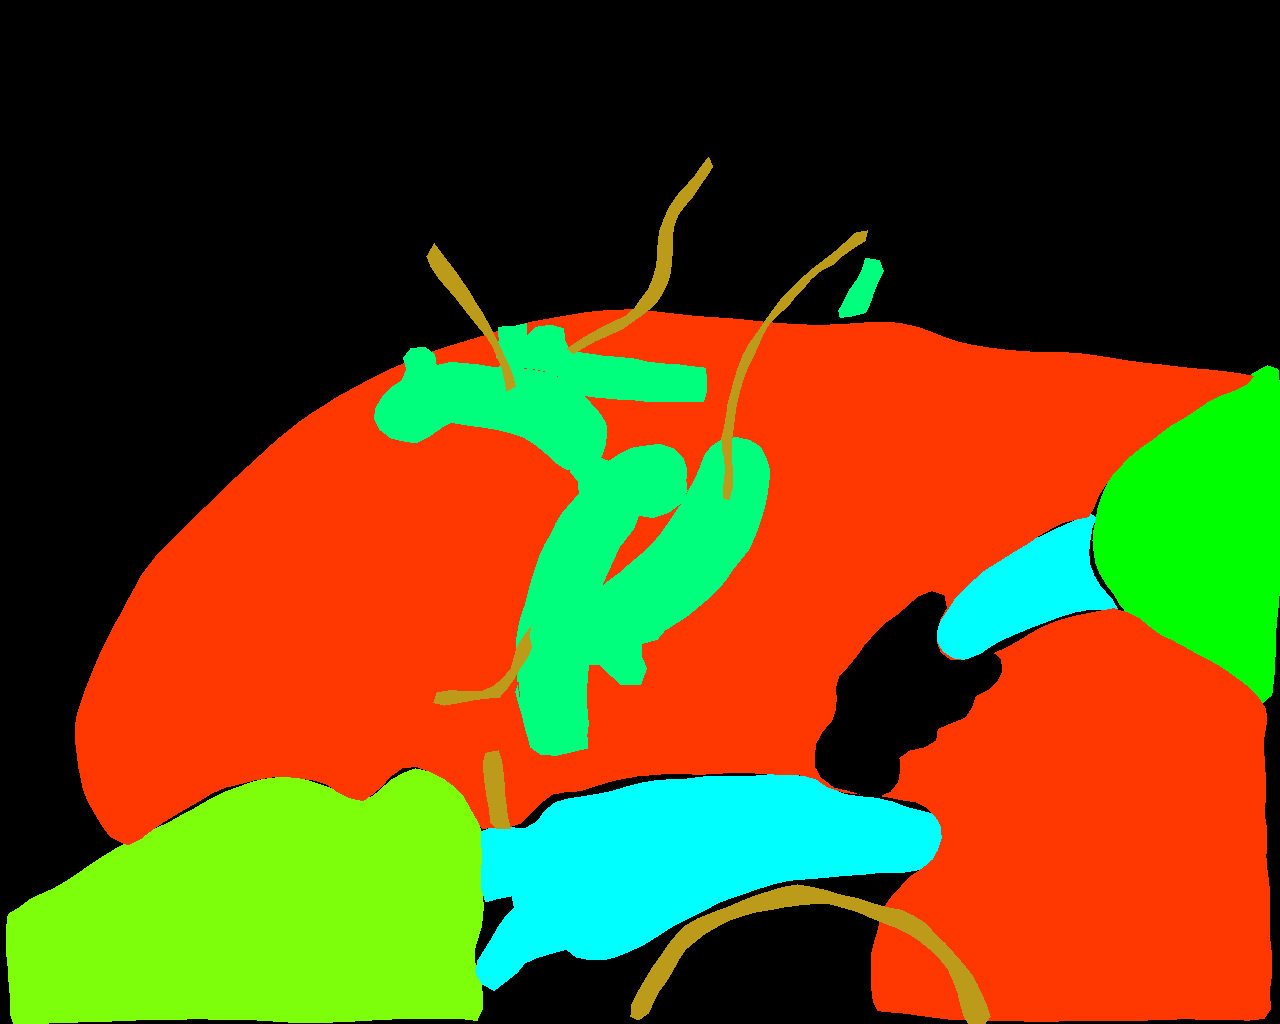

In [9]:
color_label_image

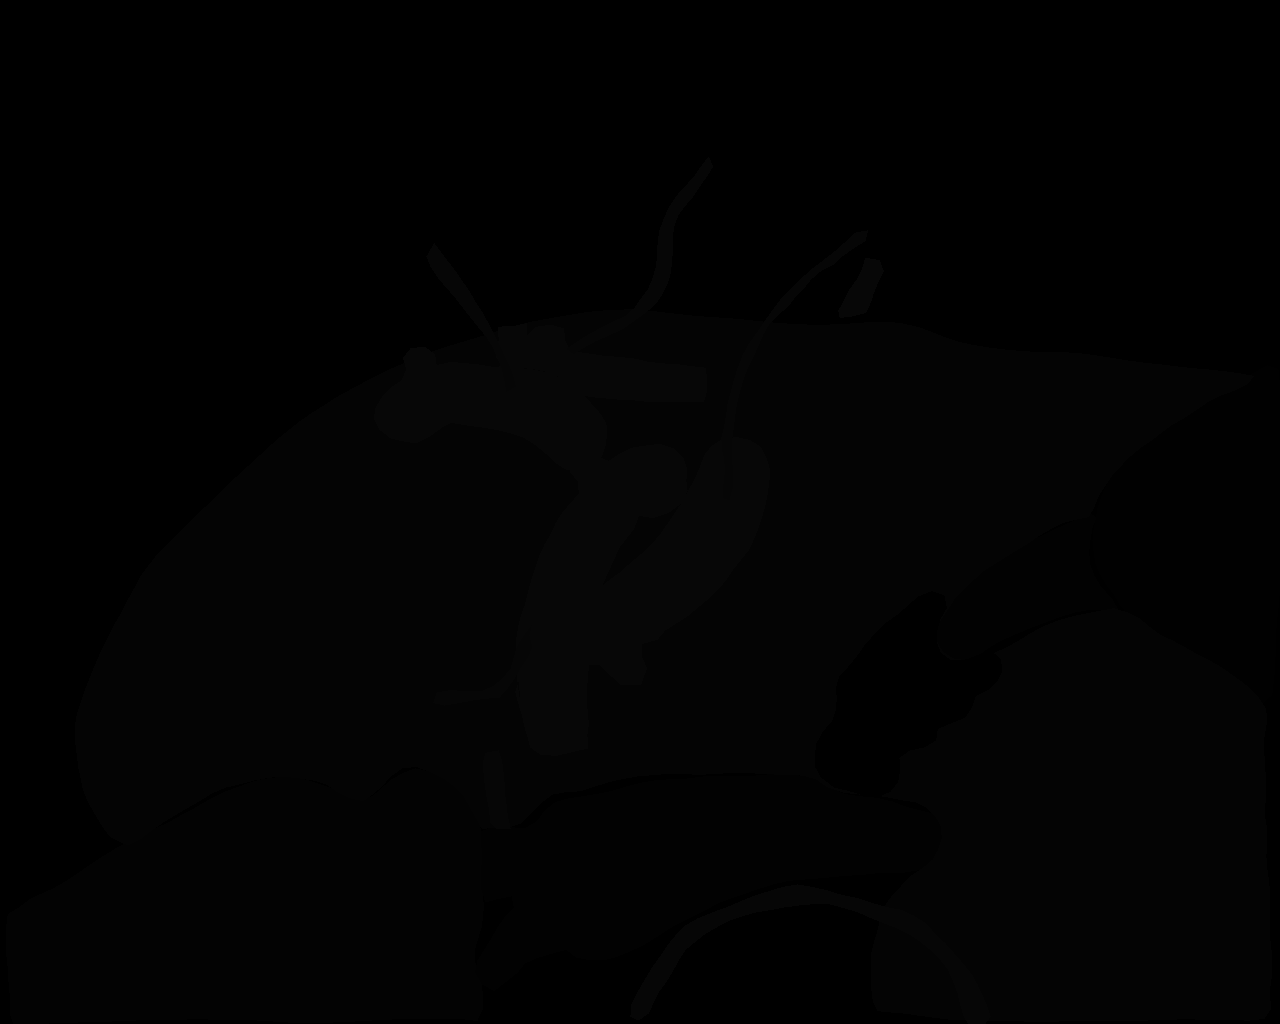

In [10]:
label_image

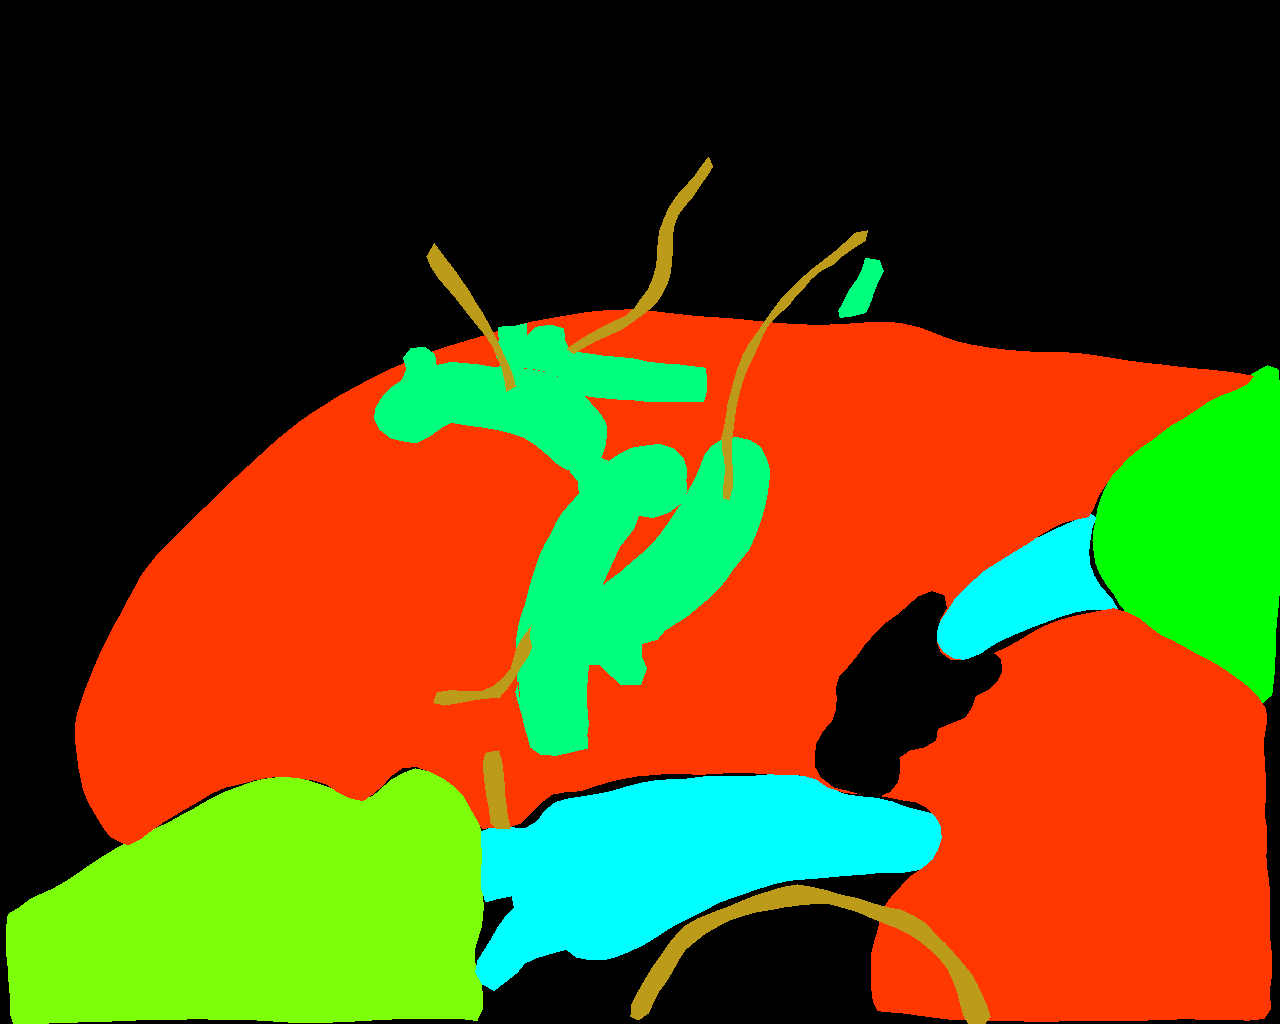

In [11]:
reconstructed_color_image

In [40]:
save_transformed_images(sequences=sequences, color_mapping=color_mapping, directory=directory)

## Creating the DataSet Class

In [12]:
from RobSceneSegDataset import RobSceneSegDataset

In [13]:
dataset = RobSceneSegDataset(root_dir=directory, sequences=sequences[:10])

In [14]:
dataset.sequences

['seq_1',
 'seq_10',
 'seq_11',
 'seq_12',
 'seq_13',
 'seq_14',
 'seq_15',
 'seq_16',
 'seq_2',
 'seq_3']